In [2]:
import pandas as pd

In [3]:
from zipfile import ZipFile

In [4]:
zip = ZipFile('train.csv.zip')  
zip.extractall()
zip.close()

In [5]:
df = pd.read_csv('train.csv')
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [6]:
df[['day','month','year']] = df['week'].str.split('/',expand=True)

In [7]:
df = df.drop('week',axis=1)

In [8]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
X,Y = df.drop('units_sold', axis=1),df['units_sold']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
#create  and fit the model
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1)

In [12]:
model.score(X_test, Y_test)

0.7548081536161558

In [13]:
from sklearn.metrics import root_mean_squared_error


In [14]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, Y_test)
rmse

29.335067513199895

Visualization

In [15]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

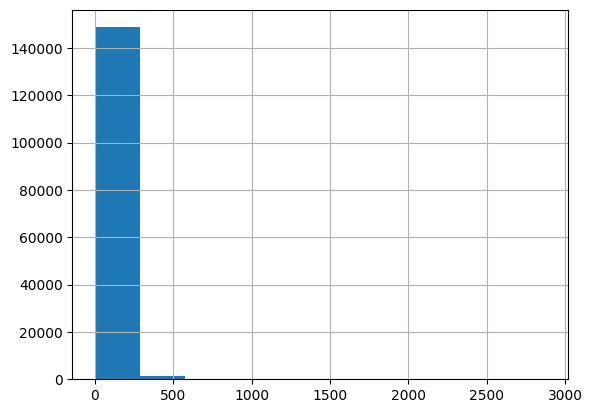

In [16]:
df.units_sold.hist()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

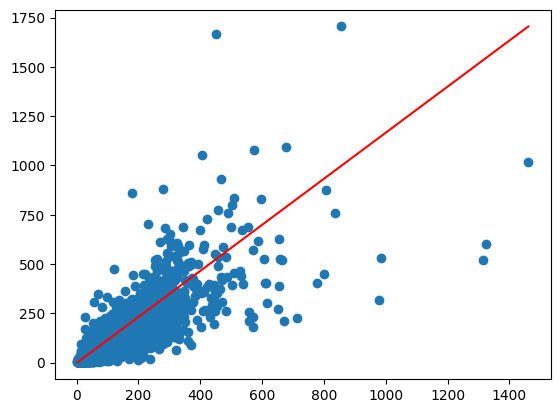

In [22]:
plt.scatter(y_pred, Y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(Y_test.min(), Y_test.max()), color = 'red')

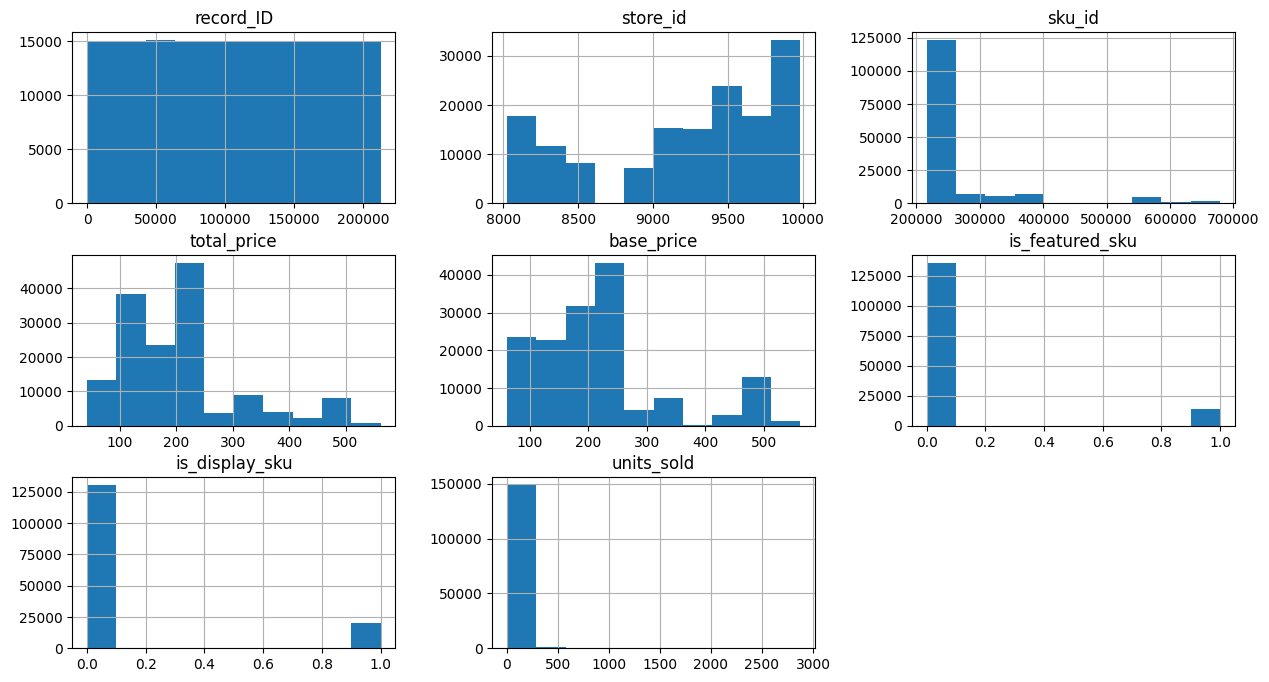

In [23]:
df.hist(figsize=(15,8))
plt.show()